<a href="https://colab.research.google.com/github/Jed-77/tensorflow-deeplearning/blob/master/TF2_0_RNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RNN for MNIST**


You can think about MNIST images as a sequence. We know the MNIST images are grey scale images of size 28x28. Thefore we can think of this as sequence, similar to how a scanner would read a document. The number of 'timesteps' T is 28, which is the row. The number of features D is 28, which is the column. So we loop through each row t (row) one at a time to learn using RNN. 

In [0]:
# Imports
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Flatten, Dense, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# Load the Data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
print("x_train shape: ", x_train.shape)
n_train, image_size_x, image_size_y = x_train.shape
print("y_train shape: ", y_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)


In [0]:
# Build an RNN (LSTM)
# RNN
i = Input(shape=(image_size_x, image_size_y))
x = LSTM(128)(i)
x = Dense(10, activation='softmax')(x)
model = Model(i, x)
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train
r = model.fit(
    x_train, y_train,
    epochs=10,
    validation_data = (x_test, y_test),
)

Epoch 1/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3292 - accuracy: 0.8947 - val_loss: 0.1264 - val_accuracy: 0.9604
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1051 - accuracy: 0.9680 - val_loss: 0.0821 - val_accuracy: 0.9735
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0726 - accuracy: 0.9776 - val_loss: 0.0739 - val_accuracy: 0.9790
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0555 - accuracy: 0.9833 - val_loss: 0.0616 - val_accuracy: 0.9804
Epoch 5/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0444 - accuracy: 0.9867 - val_loss: 0.0526 - val_accuracy: 0.9842
Epoch 6/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0381 - accuracy: 0.9882 - val_loss: 0.0514 - val_accuracy: 0.9844
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0328 - accuracy: 0.9898 - val_loss: 0.0525 -

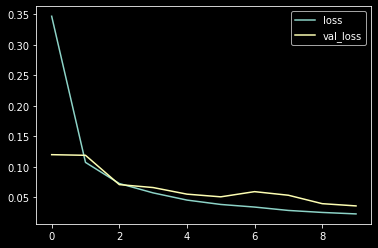

In [0]:
# Plot the loss per iteration
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

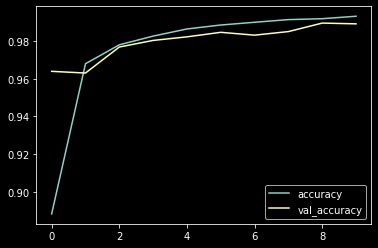

In [0]:
# Plot the accuracy per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

Non-normalised Confusion Matrix
[[ 978    0    0    0    0    0    1    1    0    0]
 [   1 1131    1    1    0    0    1    0    0    0]
 [   1    1 1020    7    0    0    0    2    1    0]
 [   0    0    0 1003    0    4    0    2    1    0]
 [   0    1    0    0  966    0    5    1    1    8]
 [   0    0    0    3    0  887    2    0    0    0]
 [   3    2    0    2    0    3  947    0    1    0]
 [   0    4    4    2    2    1    0 1009    1    5]
 [   3    1    2    2    0    2    0    0  962    2]
 [   1    0    0    1   10    5    0    2    2  988]]


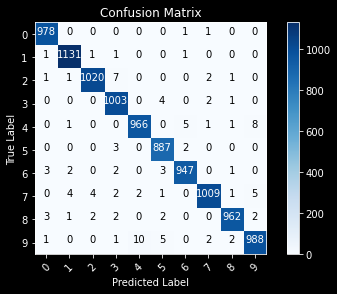

In [0]:
# Plot a confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalise=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  """
  if normalise:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalised Confusion Matrix.")
  else:
    print("Non-normalised Confusion Matrix")
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt='.2f' if normalise else 'd'
  thresh = cm.max()/2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black"
             )
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()


# run this
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True: 2, Predicted: 0')

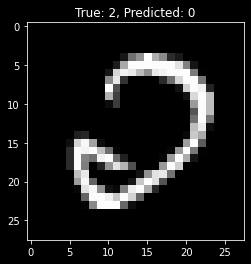

In [0]:
# Show some of the misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True: {}, Predicted: {}".format(y_test[i], p_test[i]))